<a href="https://colab.research.google.com/github/nguyenhau442001/Predict_position_of_2of_robot/blob/main/2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Solve the problem of inverse kinematics with 2 degrees of freedom (rotation),given l1=50,l2=40,px,py => angle theta1,theta2
from google.colab import files 
uploaded=files.upload()

Saving 2dof.csv to 2dof.csv


In [ ]:
import pandas as pd
url ='2dof.csv'
dataframe=pd.read_csv(url)
print(dataframe.shape)
dataframe.head(10000)

(32761, 4)


,theta1,theta2,px,py
0,0,0,90.000000,0.000000
1,0,1,89.993908,0.698096
2,0,2,89.975633,1.395980
3,0,3,89.945181,2.093438
4,0,4,89.902562,2.790259
...,...,...,...,...
9995,55,40,25.192592,80.805390
9996,55,41,24.497683,80.738478
9997,55,42,23.804048,80.659448
9998,55,43,23.111898,80.568325


In [ ]:
from sklearn.model_selection import train_test_split

theta=dataframe.drop(['px','py'], axis=1)
position=dataframe.drop(['theta1','theta2'], axis=1)


theta_train,theta_test,position_train,position_test=train_test_split(theta,position,test_size=0.2)
print(theta_train.shape) 
print(theta_train.head(10))
print(position_train.head(10))

print(theta_test.shape)  
print(position_test.shape)

(26208, 2)
(26208, 2)
       theta1  theta2
29214     161      73
21828     120     108
25084     138     106
11030      60     170
15264      84      60
14008      77      71
20600     113     147
21635     119      96
20562     113     109
18892     104      68
              px         py
29214 -70.787339 -16.082272
21828 -51.765224  13.575477
25084 -54.692087  -2.495232
11030  -0.711504  12.659492
15264 -27.134257  73.237505
14008 -22.674371  69.915274
20600 -26.482484   6.632933
21635 -57.006563  20.787928
20562 -49.262349  19.260018
18892 -51.706818  54.081710
(6553, 2)
(6553, 2)


In [ ]:
import keras
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import RMSprop  # tính sai số.
from keras.callbacks import EarlyStopping  # Dừng nhanh, khi đạt 1 giá trị nào đó thì dừng xử lý.
from sklearn import preprocessing
from sklearn.preprocessing import scale, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt


theta=theta.astype('float32')

model = Sequential()
model.add(Dense(64, kernel_initializer='normal', activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu')) 
model.add(Dense(2)) 
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,482
Trainable params: 4,482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer=RMSprop(), metrics=['accuracy'])                                                                          

Epoch 1/1000
164/164 [==============================] - 2s 4ms/step - loss: 1253.9729 - accuracy: 0.8944 - val_loss: 1100.6494 - val_accuracy: 0.9100
Epoch 2/1000
164/164 [==============================] - 0s 2ms/step - loss: 1115.3998 - accuracy: 0.9063 - val_loss: 1046.8915 - val_accuracy: 0.9143
Epoch 3/1000
164/164 [==============================] - 0s 2ms/step - loss: 1038.6224 - accuracy: 0.9120 - val_loss: 942.4370 - val_accuracy: 0.9199
Epoch 4/1000
164/164 [==============================] - 0s 2ms/step - loss: 899.4595 - accuracy: 0.9152 - val_loss: 767.8132 - val_accuracy: 0.9231
Epoch 5/1000
164/164 [==============================] - 0s 3ms/step - loss: 718.4931 - accuracy: 0.9155 - val_loss: 672.0546 - val_accuracy: 0.9184
Epoch 6/1000
164/164 [==============================] - 0s 3ms/step - loss: 557.3676 - accuracy: 0.9126 - val_loss: 493.7565 - val_accuracy: 0.9155
Epoch 7/1000
164/164 [==============================] - 0s 2ms/step - loss: 436.4954 - accuracy: 0.9073 - v

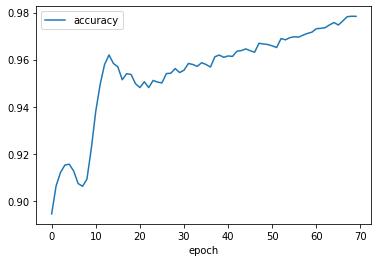

In [ ]:
history=model.fit(theta_train,position_train,batch_size=128, epochs=1000, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
score = model.evaluate(theta_test,position_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

ylim=(0,1)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')

plt.legend(['accuracy'])
plt.show()

In [ ]:
import numpy as np
theta_test=np.array(theta_test)
print(theta_test[2000])
pos_predict = model.predict(theta_test[2000].reshape(1,2))
print("Vị trí P dự đoán: ",pos_predict)
position_test=np.array(position_test)
print("Vị trí P thật: ",position_test[2000].reshape(1,2))   

[ 31 146]
Vị trí P dự đoán:  [[ 2.7559466 21.09173  ]]
Vị trí P thật:  [[ 2.91318365 27.845342  ]]
